<a href="https://colab.research.google.com/github/FetraAbdulMalik/fetra_2306039_Latihan_Workflow_AI/blob/main/data_penjualan_latihan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = {
    "Tanggal" : ["2025-02-01", "2025-02-01", "2025-02-02", "2025-02-02", "2025-02-03"],
    "Produk" : ["Basreng", "Mie Ayam", "Josu", "Mie Instan", "Bakmie"],
    "Jumlah Terjual" : [8, 10, 15, 25, 9],
    "Stok" : [10, 15, 20, 40, 15],
    "Harga Satuan" : [5000, 12000, 5000, 7000, 10000],
}

df = pd.DataFrame(data)

df.to_csv("data_penjualan_latihan.csv", index=False)

print("File CSV berhasil dibuat dan disimpan sebagai 'data_penjualan_latihan.csv'!")

File CSV berhasil dibuat dan disimpan sebagai 'data_penjualan_latihan.csv'!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("data_penjualan_latihan.csv")

print(df.head())

      Tanggal      Produk  Jumlah Terjual  Stok  Harga Satuan
0  2025-02-01     Basreng               8    10          5000
1  2025-02-01    Mie Ayam              10    15         12000
2  2025-02-02        Josu              15    20          5000
3  2025-02-02  Mie Instan              25    40          7000
4  2025-02-03      Bakmie               9    15         10000


In [ ]:
print(df.isnull().sum())

# Convert 'Tanggal' to datetime
df["Tanggal"] = pd.to_datetime(df["Tanggal"])

# Calculate 'Total Penjualan'
df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]

# Calculate 'Keuntungan' and ensure it's not negative

df["Keuntungan"] = (df["Total Penjualan"] - (df["Jumlah Terjual"] * 1000))
# Display the first few rows of the dataframe
print(df.head())

Tanggal            0
Produk             0
Jumlah Terjual     0
Stok               0
Harga Satuan       0
Total Penjualan    0
Keuntungan         0
Restock            0
dtype: int64
     Tanggal      Produk  Jumlah Terjual  Stok  Harga Satuan  Total Penjualan  \
0 2025-02-01     Basreng             8.8    10          5000          44000.0   
1 2025-02-01    Mie Ayam            11.0    15         12000         132000.0   
2 2025-02-02        Josu            16.5    20          5000          82500.0   
3 2025-02-02  Mie Instan            27.5    40          7000         192500.0   
4 2025-02-03      Bakmie             9.9    15         10000          99000.0   

   Keuntungan  Restock  
0     35200.0    False  
1    121000.0    False  
2     66000.0    False  
3    165000.0    False  
4     89100.0    False  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df["Restock"] = df["Stok"] < 5
x = df[["Jumlah Terjual", "Stok"]]
y = df["Restock"].astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Akurasi Model: {accuracy * 100:.2f}%")

Akurasi Model: 100.00%


In [ ]:
input_data = [[8,3]]

prediksi = model.predict(input_data)

status = "Perlu Restock" if prediksi[0] == 1 else "tidak Perlu di Restock"

print(f"Prediksi: {status}")

Prediksi: tidak Perlu di Restock


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


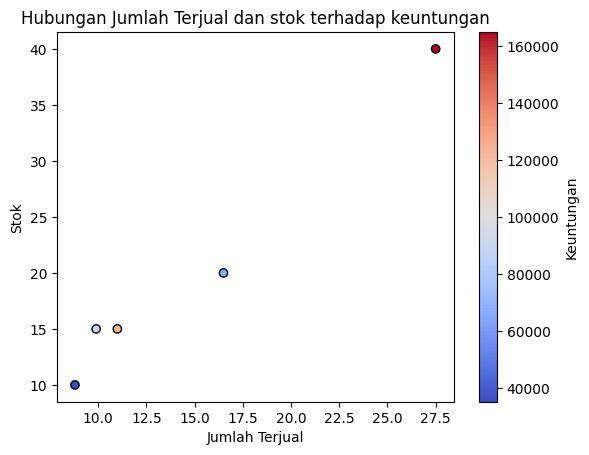

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm", edgecolors="k")
plt.colorbar(label="Keuntungan")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Hubungan Jumlah Terjual dan stok terhadap keuntungan")
plt.show()

# New Section